<a href="https://colab.research.google.com/github/TijsS/jupyterNotebook/blob/master/Copy_of_WijnOnderzoek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import seaborn as sns; sns.set()


Hier laden we de 'redwine.csv' dataset op uit onze github. Vanwege de Portugese namen gebruiken we 'cp1252' encoding.

In [2]:
url = 'https://raw.githubusercontent.com/TijsS/jupyterNotebook/master/redwine.csv?token=AKK5ONIWQUAZKIK6PQBR6RK6PXSUG'
df = pd.read_csv(url,sep=';',index_col=0,encoding='cp1252')
df.head()

,country,description,designation,points,price,province,taster_name,title,variety,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,,,,,,
242,Portugal,"This is a spicy, rich, smooth wine, immediatel...",Quinta das Setencostas,87,8.0,Alenquer,Joe Czerwinski,Casa Santos Lima 2009 Quinta das Setencostas R...,Portuguese Red,Casa Santos Lima,8.2,0.39,0.38,1.5,0.058,10.0,29.0,0.9962,3.26,0.74,9.8
1332,Portugal,"Firm tannins give a dry character, Black fruit...",Quinta das Setencostas,86,NaN,Alenquer,Roger Voss,Casa Santos Lima 2010 Quinta das Setencostas R...,Portuguese Red,Casa Santos Lima,7.9,0.35,0.21,1.9,0.073,46.0,102.0,0.9964,3.27,0.58,9.5
1366,Portugal,"Firmly tannic and dry, this is a textured wine...",Quinta das Setencostas,87,8.0,Alenquer,Paul Gregutt,Casa Santos Lima 2011 Quinta das Setencostas R...,Portuguese Red,Casa Santos Lima,8.2,1.33,-,1.7,0.081,3.0,12.0,0.9964,3.53,0.49,10.9
2367,Portugal,"From a small sub-region of Lisboa, this stylis...",Quinta das Setencostas,90,11.0,Alenquer,Virginie Boone,Casa Santos Lima 2013 Quinta das Setencostas R...,Portuguese Red,Casa Santos Lima,7.9,0.58,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5
2424,Portugal,"From a small sub-region of Lisboa, this stylis...",Quinta das Setencostas,90,11.0,Alenquer,Michael Schachner,Casa Santos Lima 2013 Quinta das Setencostas R...,Portuguese Red,Casa Santos Lima,8.5,0.37,0.2,2.8,0.090,18.0,58.0,0.998,3.34,0.70,9.6


Zoals hieronder te zien missen er wat kollomen zoals bijvoorbeeld 'alcohol' dit komt omdat ze niet goed zijn omgezet naar de float datatype

In [3]:
df.describe()
df.dtypes

country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                  object
pH                      float64
sulphates               float64
alcohol                  object
dtype: object

Hier zetten we de datatype van de kolom om naar de float type zodat we er mee kunnen rekenen. De 'foutieve' waardes die in de kollom zitten maar niet kunnen worden omgezet naar float worden NaN waardes.

In [4]:
df['alcohol'] = df['alcohol'].apply(pd.to_numeric, errors='coerce', downcast='float')
df['density'] = df['density'].apply(pd.to_numeric, errors='coerce', downcast='float')
df['citric acid'] = df['citric acid'].apply(pd.to_numeric, errors='coerce', downcast='float')
df.dtypes

country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

hier wordt de missende data/foutieve data met de gemiddelde waardes van die kollom gevult.

In [0]:
df = df.fillna(df.mean())

Hieronder is te zien dat de kolomen die eerder niet te zien waren (bijv. alcohol) nu wel te zijn zijn en dat er dus mee te rekenen is.



In [6]:
df.describe()

,points,price,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,88.811359,24.819217,8.352819,0.528162,0.299425,2.562353,0.087485,15.804665,47.218661,2.189505,3.311201,0.660353,10.413523
std,2.974000,24.105097,1.734847,0.178869,0.177555,1.407030,0.047043,10.379218,33.187830,9.444523,0.153927,0.172531,1.049672
min,81.000000,5.000000,4.600000,0.120000,0.010000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.500000
25%,87.000000,12.000000,7.100000,0.400000,0.160000,1.900000,0.070000,7.000000,22.000000,0.995690,3.210000,0.550000,9.500000
50%,88.000000,19.000000,7.900000,0.520000,0.299425,2.200000,0.079000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000
75%,91.000000,25.000000,9.300000,0.635000,0.430000,2.600000,0.091000,21.000000,64.000000,0.997900,3.400000,0.730000,11.100000
max,100.000000,450.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,100.369003,4.010000,2.000000,14.900000


#Data verkenning 
We gaan nu individueel naar specifieke kolommen kijken.

provinces:

In [7]:
provincies = df['province'].nunique()
print("we werken met " + str(provincies) + " verschillende gebieden waar de wijn vandaan komen")

we werken met 30 verschillende gebieden waar de wijn vandaan komen


Prijs:

In [8]:
gemiddeldePrice = df['price'].mean()
maxPrice = df['price'].max()

print("de gemiddelde prijs van de wijnen is: " + str(gemiddeldePrice) + " euro")
print("de maximale prijs van de wijnen is: " + str(maxPrice) + " euro")


de gemiddelde prijs van de wijnen is: 24.81921675774146 euro
de maximale prijs van de wijnen is: 450.0 euro


Hieronder in de boxplot van de prijs van de wijn is te zien dat er erg veel uitschieters zijn. Dit zal ons dan ook kunnen helpen in de deelvragen 'Kun je op basis van de gemiddelde temperatuur wat zeggen over de prijs?' en 'Zorgt de prijs voor een wijn voor een significant verschil t.o.v. de score van de wijn?'.

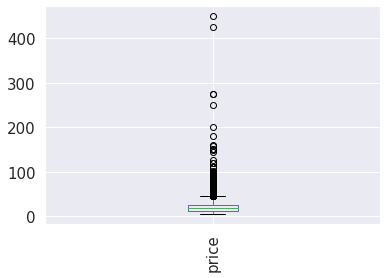

In [9]:
boxplot = df[['price']].boxplot(grid=True, rot=90, fontsize=15)

Score:

In [10]:
gemiddeldePoints = df['points'].mean()
maxPoints = df['points'].max()

print("de gemiddelde aantal punten van de wijnen is: " + str(gemiddeldePoints) + " punten")
print("de maximale aantal punten van de wijnen is: " + str(maxPoints) + " punten")

de gemiddelde aantal punten van de wijnen is: 88.81135902636917 punten
de maximale aantal punten van de wijnen is: 100 punten


In de boxplot is te zien dat er 2 uitschieters zijn. Terugkijkend naar de boxplot over prijs is te zien dat er ook 2 extreme uitschieters waren. Als dit dezelfde wijnen zijn lijkt het op eerste gezicht dat er misschien inderdaad een verband kan zijn tussen prijs en score.

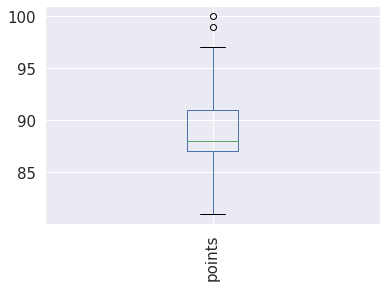

In [11]:
boxplot = df[['points']].boxplot(grid=True, rot=90, fontsize=15)

# Deelvraag: In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?


Bij deze vraag gaan wij gebruik maken van unsupervised machine learning om er achter te komen hoe de score van deze wijnen
samenhangt met de chemische samenstelling. Hiervoor zullen wij scikit learn gebruiken.

Als bonus willen wij mocht hier de tijd voor zijn bepaalde keywords voor verschildende chemische samenstellingen te vinden.
Dit willen wij doen door middel van de description.


# Deelvraag: Heeft de proever voorkeur voor een bepaalde pH-waarde en kunnen we hierdoor de gegeven punten van een wijn voorspellen?

Voor deze vraag pakken wij 3 proevers met de meeste reviews. De score van de wijn vergelijken met de ph waarde. Als we hierin een verband zien kunnen we door middel van supervised machine learning de score voorspellen.

We pakken de 3 mensen met de meeste reviews. Dit doen we omdat we anders mensen gaan krijgen met een te kleine sample size. 

In [12]:
dfD2 = df.copy()
dfD2.taster_name.value_counts()


Roger Voss            630
Michael Schachner     384
Kerin O’Keefe         258
Virginie Boone        220
Paul Gregutt          218
Joe Czerwinski        143
Matt Kettmann         140
Sean P. Sullivan      125
Jim Gordon            107
Anna Lee C. Iijima     84
Anne Krebiehl MW       55
Lauren Buzzeo          38
Susan Kostrzewa        29
Alexander Peartree     14
Jeff Jenssen            9
Mike DeSimone           5
Carrie Dykes            3
Fiona Adams             3
Name: taster_name, dtype: int64

Het blijkt dat de top 3 bestaat uit: Roger voss, Michael Schachner en Kerin O'Keefe.

In [0]:
dfRoger = dfD2[['points', 'alcohol']].loc[df['taster_name'] == 'Roger Voss']
dfMichael = dfD2[['pH', 'points']].loc[df['taster_name'] == 'Michael Schachner']
dfKerin = dfD2[['pH', 'points']].loc[df['taster_name'] == 'Kerin O’Keefe']

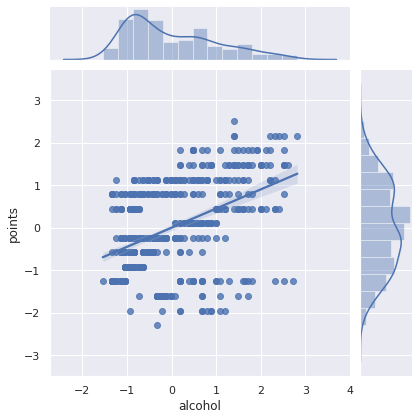

In [14]:
#scatterplot van de gegevens van Roger
#alcohol + total sulfur dioxide?
#pH + alcohol??
#pH + citric acid?
Q1 = dfRoger['alcohol'].quantile(0.25)
Q3 = dfRoger['alcohol'].quantile(0.75)
IQR = Q3 - Q1

filter = (dfRoger['alcohol'] >= Q1 - 1.5 * IQR) & (dfRoger['alcohol'] <= Q3 + 1.5 *IQR)
dfRoger = dfRoger.loc[filter] 

Q1 = dfRoger['points'].quantile(0.25)
Q3 = dfRoger['points'].quantile(0.75)
IQR = Q3 - Q1

filter = (dfRoger['points'] >= Q1 - 1.5 * IQR) & (dfRoger['points'] <= Q3 + 1.5 *IQR)
dfRoger = dfRoger.loc[filter] 

#normaliseer waardes van Roger 
dfRoger=(dfRoger-dfRoger.mean())/dfRoger.std()

ax = sns.jointplot('alcohol', 'points', data=dfRoger,kind="reg")

In [0]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)

    ax.scatter(X['alcohol'], X['points'], c=labels, s=40, cmap='viridis', zorder=2)

    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
      draw_ellipse(pos, covar, alpha=w * w_factor)

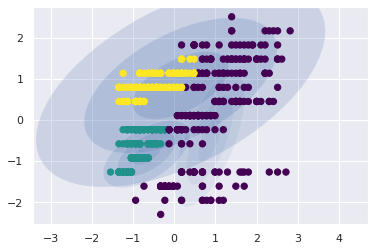

In [91]:
import numpy as np
from sklearn import mixture
from sklearn.mixture import GaussianMixture as GMM

mixture.GaussianMixture(dfRoger)

gmm = GMM(n_components=3, n_init = 100, covariance_type='full').fit(dfRoger)
plot_gmm(gmm, dfRoger)

In [17]:

  #de correlatie tussen pH en points van Roger voor het normaliseren van waardes
dfRoger.corr()

,points,alcohol
points,1.000000,0.451112
alcohol,0.451112,1.000000


In [18]:
#de correlatie tussen pH en points van Roger na het normaliseren van waardes
dfRoger=(dfRoger-dfRoger.mean())/dfRoger.std()
dfRoger.corr()

,points,alcohol
points,1.000000,0.451112
alcohol,0.451112,1.000000


Het normalizeren van de data maakt natuurlijk geen verschil

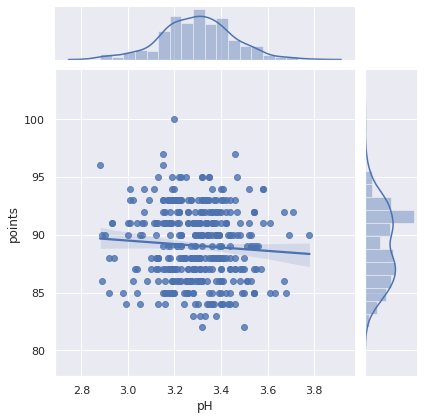

In [19]:
#scatterplot van de gegevens van Michael
ax = sns.jointplot('pH', 'points', data=dfMichael,kind="reg")

In [20]:
dfMichael.corr()

,pH,points
pH,1.000000,-0.070549
points,-0.070549,1.000000


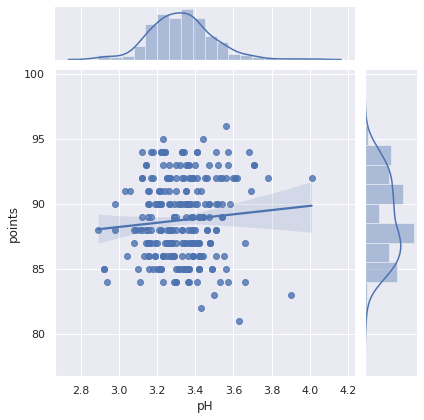

In [21]:
#scatterplot van de gegevens van Kerin
ax = sns.jointplot('pH', 'points', data=dfKerin,kind="reg")

In [22]:
dfKerin.corr()

,pH,points
pH,1.000000,0.085101
points,0.085101,1.000000


Bij Roger en Michael is op eerste gezicht nog wel een correlatie te zien. Bij Kerin is dit al wat minder. We zullen Dit waarschijnlijk ook in de accuraatheid van de machine learning zien.

# Deelvraag: Zorgt de prijs voor een wijn voor een significant verschil t.o.v. de score van de wijn?

Wij gaan hier onderzoekdoen naar de relatie tussen de prijs en de score van de wijn. Dit doen wij doormiddel van een
scatterplot met trend lijn. Ook zullen wij de wijnen opdelen in prijscatagorien en hier vervolgens de gemidelde prijs voor berekennen.

In [23]:
dfGoedkoop = df[df['price'] <= 5]
dfMedium = df[(df['price'] > 5) & (df['price'] <= 13)]
dfDuur = df[(df['price'] > 13) & (df['price'] <= 50)]
dfExclusief = df[df['price'] > 50]

objects = ('Goodkope Wijn\n(€5 of minder)', 'Medium\n(€5 tot €13)', 'Duur\n(€13 tot €50)', 'Exclusief\n(Meer dan €50)')
y_pos = np.arange(len(objects))
performance = [dfGoedkoop['points'].mean(),dfMedium['points'].mean(), dfDuur['points'].mean(),dfExclusief['points'].mean()]

plt.bar(y_pos, catag, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
# for index, value in enumerate(catag):
#     plt.text(value, index, str(value))
plt.ylabel('Points')
plt.title('Gemidelde score per prijscatagorie')

plt.show()

NameError: ignored

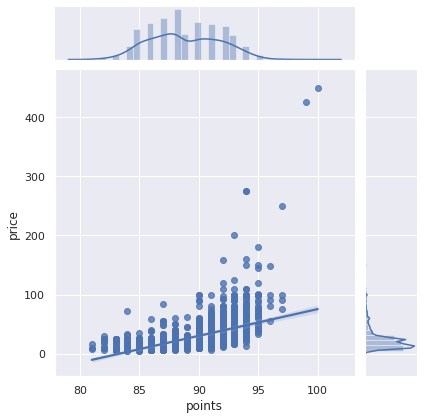

In [24]:
ax = sns.jointplot('points', 'price', data=df,kind="reg")

# Deelvraag: Kun je op basis van de gemiddelde temperatuur wat zeggen over de prijs?

De dataset van de temperaturen per (wijn)gebied wordt ingeladen. Weer met gebruik van 'cp1252' encoding.

In [25]:
urlTemperatureDataset = 'https://raw.githubusercontent.com/TijsS/jupyterNotebook/master/dataset.csv?token=AKK5ONP43VJBBDANGVHCPIS6PXSTW'
Tempdf = pd.read_csv(urlTemperatureDataset,sep=';',encoding='cp1252')
#copy van de nodige data voor deelvraag 4
dfD4 = df[['province','price']].copy()
#sommige wijnen hebben 'foutieve' provincies zoals bijvoorbeeld 'portugal' 
#dit is natuurlijk niet bruikbaar. Deze waardes halen we hieronder weg
dfD4 = dfD4[~dfD4['province'].isin(['Portugal', 'Portuguese Table Wine',"Vinho da Mesa","Table wine", "Vinho Licoroso","Vinho Verde"]) ]
#voor voorbeeld van de temperature dataset
Tempdf.head()


,province,temp,source
0,Minho,14.2,https://en.climate-data.org/europe/portugal/me...
1,Alentejano/Alentejo,14.5,https://en.climate-data.org/europe/portugal/al...
2,Trás-os-Montes,14.7,https://en.climate-data.org/europe/portugal/mi...
3,Beira Interior,15.4,https://nl.climate-data.org/europa/portugal/ca...
4,Dão/Terras do Dão,15.5,https://en.climate-data.org/europe/portugal/sa...


Eerst berekenen we de gemiddelde prijs per gebied. Hierna plaatsen we de gemmidelde temperatuur over een map van portugal in kleuren. We zetten dan de als we dit hebben gedaan de gemmidelde prijzen op de juiste locatie op de map van portugal. Nadat je dit hebt gedaan heb je een mooi overzicht van de prijs/temperatuur correlatie. Hiermee kun je dan de deelvraag beantwoorden.

Veel van de genoemde gebieden in de wijndataset zijn veroudert en hebben nu een nieuwe naam. Of gebruiken ze verschillende wijn gebied labels (DOC, VR). Om deze reden zijn sommige gebieden samen gegroepeerd omdat het eigenlijk dus (ongeveer) hetzelfde gebied is.

In [0]:
#groepeer Alentejano en Alentejo door de provincie Alentejano te veranderen naar Alentejo
dfD4.loc[dfD4.province == 'Alentejano', 'province'] = "Alentejo"
#Hier doen we hetzelfde voor andere provincies
dfD4.loc[dfD4.province == 'Dão', 'province'] = "Terras do Dão"
dfD4.loc[dfD4.province == 'Bairrada', 'province'] = "Beira Atlantico"
dfD4.loc[dfD4.province == 'Douro', 'province'] = "Duriense"
dfD4.loc[dfD4.province == 'Estremadura', 'province'] = "Lisboa"
dfD4.loc[dfD4.province == 'Ribatejano', 'province'] = "Tejo"
dfD4.loc[dfD4.province == 'Ribatejo', 'province'] = "Tejo"
dfD4.loc[dfD4.province == 'tejo', 'province'] = "Tejo"
dfD4.loc[dfD4.province == 'Península de Setúbal', 'province'] = "Setubal"
dfD4.loc[dfD4.province == 'Terras do Sado', 'province'] = "Setubal"
dfD4.loc[dfD4.province == 'Algarve', 'province'] = "faro"

In [0]:
#hier maken we de column temperature aan bij de df, hierin stoppen we de temperatuur van de externe dataframe per regio
dfD4['temperature'] = 0
dfD4.loc[dfD4.province == 'Alenquer', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Alenquer"].values[0]
dfD4.loc[dfD4.province == 'Alentejo', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Alentejano/Alentejo"].values[0]
dfD4.loc[dfD4.province == 'Beira Atlantico', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Bairrada/Beira Atlantico"].values[0]
dfD4.loc[dfD4.province == 'Beira Interior', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Beira Interior"].values[0]
dfD4.loc[dfD4.province == 'Beiras', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Beiras"].values[0]
dfD4.loc[dfD4.province == 'Duriense', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Douro/Duriense"].values[0]
dfD4.loc[dfD4.province == 'Lisboa', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Estremadura/Lisboa"].values[0]
dfD4.loc[dfD4.province == 'Minho', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Minho"].values[0]
dfD4.loc[dfD4.province == 'Obidos', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Obidos"].values[0]
dfD4.loc[dfD4.province == 'Palmela', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "palmela "].values[0]
dfD4.loc[dfD4.province == 'Setubal', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Península de Setúbal/Setubal"].values[0]
dfD4.loc[dfD4.province == 'Tejo', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Ribatejano/Ribatejo/tejo"].values[0]
dfD4.loc[dfD4.province == 'Terras do Dão', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Dão/Terras do Dão"].values[0]
dfD4.loc[dfD4.province == 'Trás-os-Montes', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Trás-os-Montes"].values[0]
dfD4.loc[dfD4.province == 'faro', 'temperature'] = Tempdf[['temp']].loc[Tempdf.province == "Algarve/faro"].values[0]


In [28]:
dfD4.dtypes

province        object
price          float64
temperature     object
dtype: object

De datatype van temperature is nu object we maken dit een float waarde.

In [29]:
dfD4['temperature'] = dfD4['temperature'].astype(float)
dfD4.dtypes

province        object
price          float64
temperature    float64
dtype: object

In [30]:
#hier is de gemiddelde prijs per temperatuur berekend en afgerond op 2 decimalen.
dfD4TempPrice = dfD4.groupby(['temperature']).mean().round(2)
dfD4TempPrice = dfD4TempPrice.reset_index()
dfD4TempPrice

,temperature,price
0,14.2,17.67
1,14.5,23.92
2,14.7,33.45
3,15.4,22.00
4,15.5,23.28
5,15.6,26.39
6,15.7,30.83
7,16.1,17.91
8,16.3,12.80
9,16.5,32.41


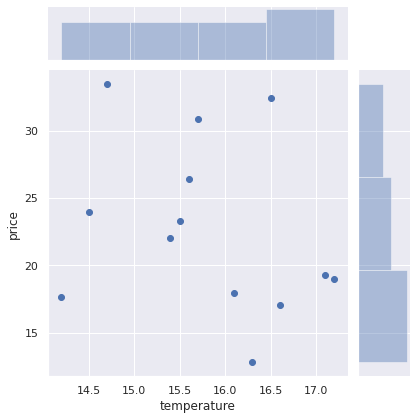

In [31]:
#in de scatterplot en de grafiek hierboven kun je misschien al een lichte correlatie zien tussen temperatuur en 
ax = sns.jointplot(x="temperature", y="price", data=dfD4TempPrice)